# US Beveridge Curve 



A curva de Beveridge descreve uma relação negativa entre desemprego e taxa de vacância em que se compara o fluxo de novas vagas com o fluxo de desempregados, sendo melhor entendida num contexto de análise da eficiência do mercado de trabalho, ou matching. 

Em tempos de expansão economica, o desemprego é baixo e as vagas, ou seja, as vagas oferecidas pelas empresas, são abundantes. As empresas querem expandir a sua força de trabalho, mas não conseguem fazê-lo, uma vez que o número de potenciais empregados (ou seja, os desempregados) é pequeno. 

À medida que a economia desacelera e a procura diminui, as empresas publicam menos vagas e o desemprego aumenta, consistente com um movimento descendente ao longo da curva de Beveridge. No vale do ciclo de negócios, as empresas podem ter expectativas de um aumento futuro na demanda e comece a postar vagas em aberto. Esta decisão é amplificada pelo grande número de desempregados, o que garante às empresas grandes probabilidades de encontrar candidatos adequados e portanto, supera os custos de pesquisa incorridos. À medida que a economia melhora, o desemprego cai e as ofertas de emprego aumentam num movimento ascendente ao longo da curva de Beveridge.



# Suposições e consequências do Modelo 

A suposição de que a publicação de vagas é dispendiosa implica que uma posição preenchida é valiosa: as empresas não querem perder trabalhadores, uma vez que encontrar novos é dispendioso. Consequentemente, há valor em manter relações de trabalho duradouras.

Esta percepção leva a uma regra de contratação que os economistas do trabalho geralmente chamam de “condição de criação de emprego”. O custo esperado de publicar uma vaga — incluindo a probabilidade de uma empresa encontrar um candidato a emprego — é igual ao valor descontado dos benefícios futuros que a empresa espera obter com a relação. Isto reflete principalmente receitas líquidas de salários e representa a potencial necessidade de um novo trabalhador no futuro.

Os trabalhadores selecionados atráves desse "matching" aceitam qualquer oferta de emprego que satisfaça pelo menos o que os economistas chamam de salário de reserva, ou o valor mínimo que aceitariam para realizar um trabalho. Este conceito resume a ideia de que aceitar (ou não) ofertas de emprego é uma escolha explícita. Os trabalhadores podem pesar os benefícios de trabalhar (principalmente o salário e os benefícios acessórios) versus os benefícios de não trabalhar (o que inclui medidas de pagamentos de desemprego, a probabilidade de encontrar uma oferta melhor e o valor do tempo de não trabalhar). Uma vez que os empregadores estão conscientes destas opções e fazem ofertas salariais em conformidade, as correspondências resultam em relações de emprego mutuamente benéficas.

Quando a taxa de desemprego é elevada (e, consequentemente, o número de candidatos a emprego é grande), os empregadores consideram mais fácil e menos dispendioso contratar trabalhadores. Assim, eles publicam mais vagas. Da mesma forma, a condição de acumulação de emprego é descendente. À medida que a taxa de abertura de empregos aumenta, a taxa de desemprego diminui, uma vez que estão a ser criadas novas correspondências entre trabalhadores e empresas.



# Por que a curva de Beveridge pode se deslocar?


A localização da curva ao longo do ciclo económico é determinada pelo número de ofertas de emprego necessárias para manter uma determinada taxa de desemprego. Se o processo de correspondência entre trabalhadores e empresas se tornar *menos eficiente*, uma determinada taxa de desemprego implica uma taxa de abertura de emprego mais elevada. Ou seja, os empregadores precisam divulgar mais vagas para preencher um determinado número de cargos. Em termos do modelo, um deslocamento para fora da curva de Beveridge pode, portanto, ser explicado por um declínio na eficiência do jogo.

Este declínio na eficiência dos processo de busca por empregados pode ser causado por uma variedade de fatores. As mudanças sectoriais, a evolução dos requisitos de competências e a dispersão geográfica podem desempenhar um papel. Por exemplo, um trabalhador da indústria automóvel recentemente despedido no Centro-Oeste pode ter dificuldade em conseguir um emprego como enfermeiro no Sudoeste.


# Mudança da Curva desde a Pandemia até dias atuais






In [2]:
!pip install fredpy

In [136]:
import statsmodels as sm
import fredpy as fp
import numpy as np
import pandas as pd
import os,urllib
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

# Load fredpy api key
fp.api_key = "0a66397a59605965be293d0797865005"

## Unemployment Rate


In [138]:
# Seasonally adjusted
# Download from FRED
unemp_1 = fp.series('M0892AUSM156SNBR')
unemp_1 = unemp_1.window(['04-01-1929','02-01-1940']).data

In [6]:
# Seasonally adjusted

# Download from FRED and save as a Pandas series
unemp_2 = fp.series('M0892BUSM156SNBR')
unemp_2 = unemp_2.window(['03-01-1940','12-01-1946']).data

In [139]:
# Seasonally  adjusted
unemp_4 = fp.series('UNRATE')
unemp_4 = unemp_4.window(['01-01-1948','01-01-2200']).data

In [141]:
unemployment_rate_series = pd.concat([unemp_1,unemp_2]).sort_index()
unemployment_rate_series = pd.DataFrame(pd.concat([unemployment_rate_series,unemp_4]).sort_index())
unemployment_rate_series.index = pd.to_datetime(unemployment_rate_series.index)
unemployment_rate_series = unemployment_rate_series[unemployment_rate_series.index >= "2001-01-01"]
unemployment_rate_series

,value
date,
2001-01-01,4.2
2001-02-01,4.2
2001-03-01,4.3
2001-04-01,4.4
2001-05-01,4.3
...,...
2023-12-01,3.7
2024-01-01,3.7
2024-02-01,3.9


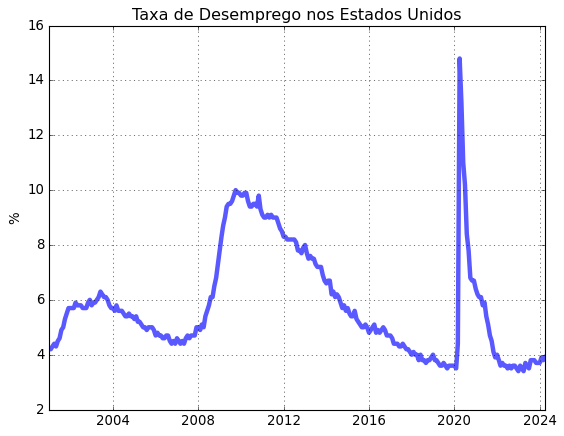

In [144]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(unemployment_rate_series,'-',lw=4,alpha = 0.65)
ax.set_title("Taxa de Desemprego nos Estados Unidos")
ax.set_ylabel('%')
ax.grid()

## Vacancies ou Vagas de emprego abertas nos Estados Unidos

In [145]:
# Job Openings and Labor Turnover Survey (JOLTS)
# Seasonally adjusted

vac_3 = pd.DataFrame(fp.series('JTSJOL').data)
vac_3.index = pd.to_datetime(vac_3.index)
vac_3 = vac_3[vac_3.index >= "2001-01-01"]
vac_3

,value
date,
2001-01-01,5234.0
2001-02-01,5097.0
2001-03-01,4762.0
2001-04-01,4615.0
2001-05-01,4425.0
...,...
2023-12-01,8889.0
2024-01-01,8748.0
2024-02-01,8813.0


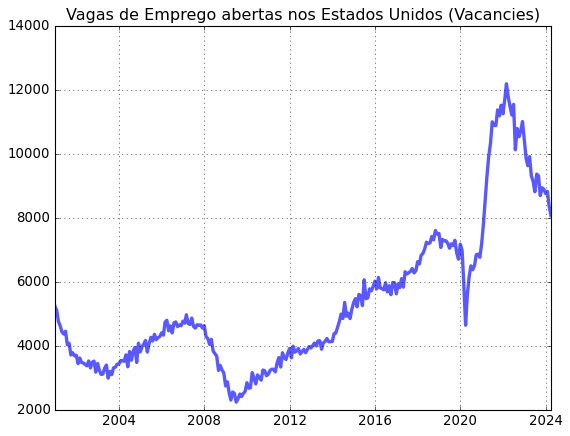

In [146]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(vac_3,'-',lw=3,alpha = 0.65)
ax.set_title('Vagas de Emprego abertas nos Estados Unidos (Vacancies)')
ax.grid()

## Dados do mercado de Trabalho nos Estados Unidos 


In [147]:
# Civilian labor force over 16 years of age in thousands of persons
# Seasonally adjusted
lf_1 = fp.series('CLF16OV')
lf_1 = pd.DataFrame(lf_1.data)
lf_1.index = pd.to_datetime(lf_1.index)
lf_1 = lf_1[lf_1.index >= "2001-01-01"]
lf_1

,value
date,
2001-01-01,143800.0
2001-02-01,143701.0
2001-03-01,143924.0
2001-04-01,143569.0
2001-05-01,143318.0
...,...
2023-12-01,167451.0
2024-01-01,167276.0
2024-02-01,167426.0


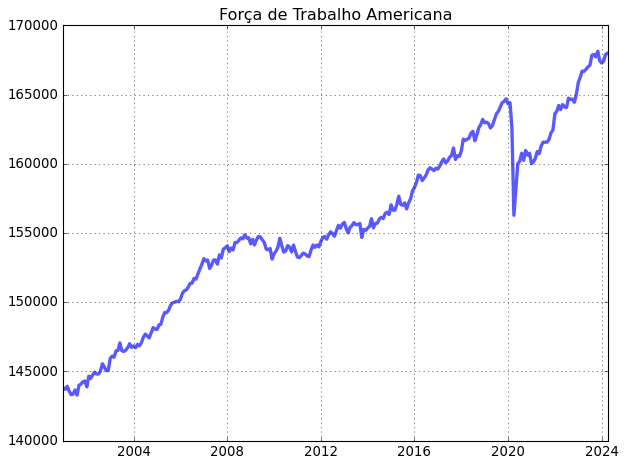

In [148]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(lf_1,'-',lw=3,alpha = 0.65)
ax.set_title('Força de Trabalho Americana')
ax.grid()

fig.tight_layout()

## Vacancy rate (Taxa de vagas abertas em relação a força de trabalho nos Estados Unidos)


In [155]:
# Construct the vacancy_rate series
vacancy_rate_series = (vac_3 / lf_1)*100
labor_force_series = lf_1

vacancy_series = vacancy_rate_series*labor_force_series/100
unemployment_series = unemployment_rate_series*labor_force_series/100
market_tightness_series = vacancy_series/unemployment_series

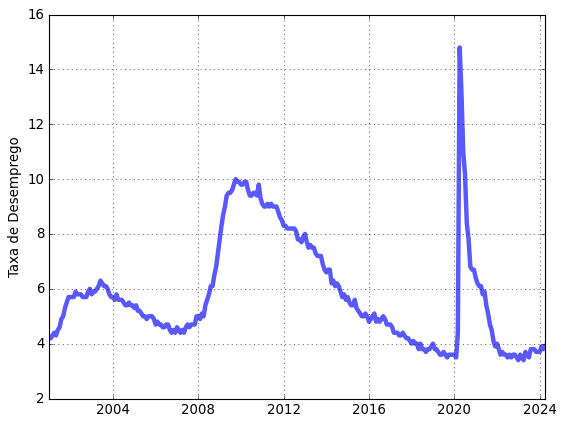

In [264]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(unemployment_rate_series,'-',lw=4,alpha = 0.65)
ax.set_ylabel('Taxa de Desemprego')
ax.grid()

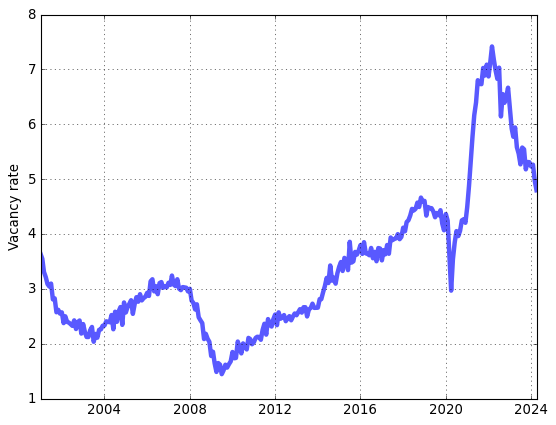

In [156]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(vacancy_rate_series,'-',lw=4,alpha = 0.65)
ax.set_ylabel('Taxa de Vacância')
ax.grid()

## Organizando os Dados selecionados 


In [206]:
df_rates = pd.concat([unemployment_rate_series,vacancy_rate_series,market_tightness_series], join='outer', axis = 1).dropna()
df_rates.columns = ['Unemployment rate','Vacancy rate','Market tightness']

df_levels= pd.concat([unemployment_series,labor_force_series,vacancy_series], join='outer', axis = 1).dropna()
df_levels.columns = ['Unemployment [Thousands of persons]','Labor force [Thousands of persons]','Vacancies [Thousands of vacancies]']

df_all = pd.concat([df_rates,df_levels], join='outer', axis = 1).dropna()

# Separando os dados em amostras menores 
df_pre_gr = df_all[(df_all.index < '12-01-2007')]
df_post_gr = df_all[(df_all.index>= '12-01-2007')]


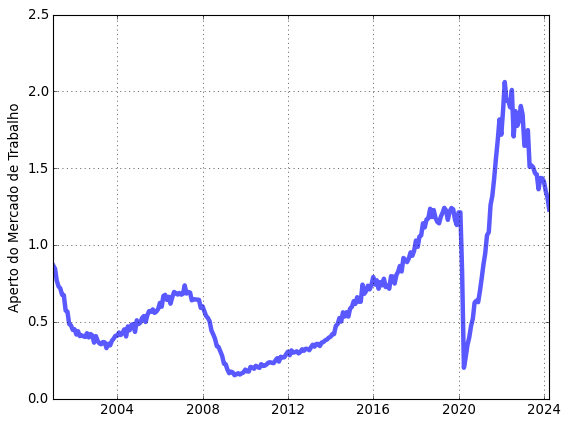

In [176]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot_date(df_all.index,df_all['Market tightness'].values,'-',lw=4,alpha = 0.65)
ax.set_ylabel('Aperto do Mercado de Trabalho')
ax.grid()

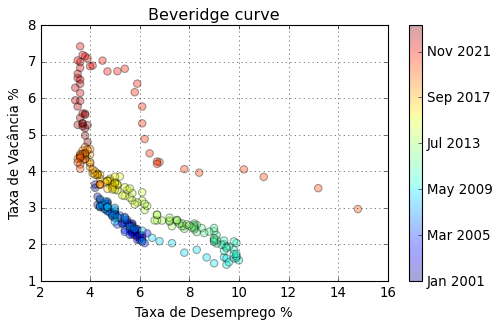

In [243]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)
c = np.arange(len(df_all.index))
plt.scatter(df_all['Unemployment rate'].values,df_all['Vacancy rate'].values,s=45,c= c,alpha = 0.35)
ax.set_title('Beveridge curve')
ax.set_xlabel('Taxa de Desemprego %')
ax.set_ylabel('Taxa de Vacância %')
ax.grid()

##############################################################################################

cbar = plt.colorbar(ax = ax)
cbar.get_ticks()
cbar.set_ticks([int(i) for i in cbar.get_ticks()[:-1]])
cbar.set_ticklabels([df_all.index[int(i)].strftime('%b %Y') for i in cbar.get_ticks()[:]])

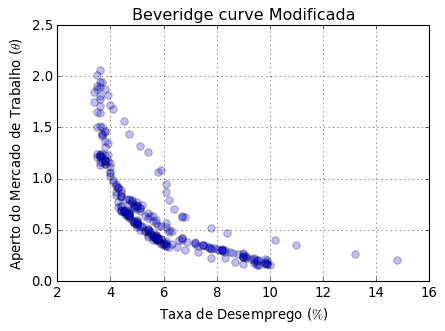

In [244]:
# Plot the modified Beveridge curve for the US: market tightness v unemployment rate

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
c = np.arange(len(df_all.index))
plt.scatter(df_all['Unemployment rate'].values,df_all['Market tightness'].values,s=45,c= 'blue',alpha = 0.25)
ax.set_title('Beveridge curve Modificada')
ax.set_xlabel('Taxa de Desemprego ($\%$)')
ax.set_ylabel('Aperto do Mercado de Trabalho ($\\theta$)')
ax.grid()


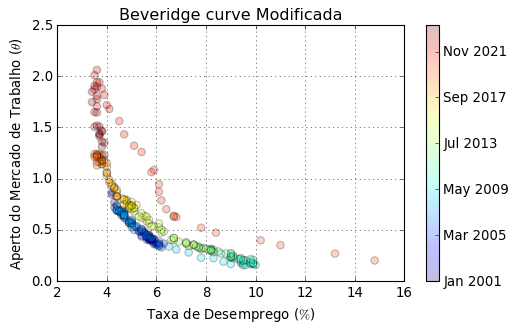

In [246]:
# Plot the modified Beveridge curve for the US: market tightness v unemployment rate

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)
c = np.arange(len(df_all.index))
plt.scatter(df_all['Unemployment rate'].values,df_all['Market tightness'].values,s=45,c=c,alpha = 0.25)
ax.set_title('Beveridge curve Modificada')
ax.set_xlabel('Taxa de Desemprego ($\%$)')
ax.set_ylabel('Aperto do Mercado de Trabalho ($\\theta$)')
ax.grid()

cbar = plt.colorbar(ax = ax)
cbar.get_ticks()
cbar.set_ticks([int(i) for i in cbar.get_ticks()[:-1]])
cbar.set_ticklabels([df_all.index[int(i)].strftime('%b %Y') for i in cbar.get_ticks()[:]])

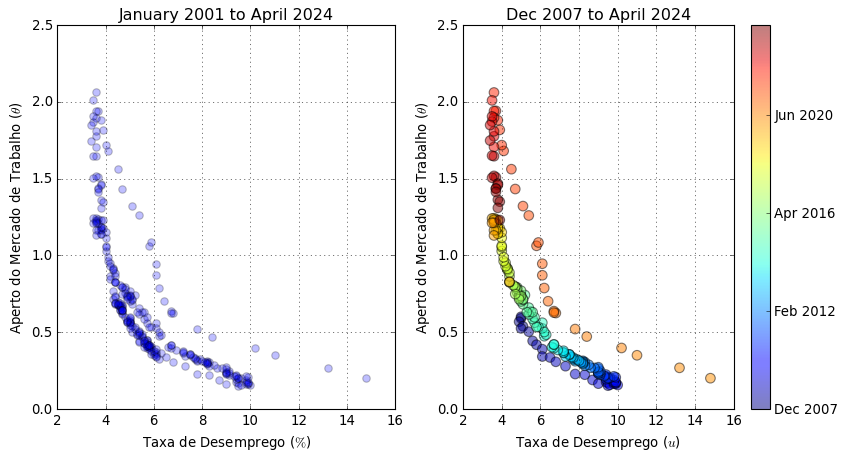

In [260]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
c = np.arange(len(df_all.index))
plt.scatter(df_all['Unemployment rate'].values,df_all['Market tightness'].values,s=45,c= 'blue',alpha = 0.25)
ax.set_title(df_all.index[0].strftime('%B %Y')+' to '+df_all.index[-1].strftime('%B %Y'))
ax.set_xlabel('Taxa de Desemprego ($\%$)')
ax.set_ylabel('Aperto do Mercado de Trabalho ($\\theta$)')
ax.grid()

##############################################################################################################

ax = fig.add_subplot(1,2,2)
c = np.arange(len(df_post_gr.index))

plt.scatter(df_post_gr['Unemployment rate'].values,df_post_gr['Market tightness'].values,s=75,alpha = 0.5,c=c)

cbar = plt.colorbar(ax = ax)
cbar.set_ticks([int(i) for i in cbar.get_ticks()[:-1]])
cbar.set_ticklabels([df_post_gr.index[int(i)].strftime('%b %Y') for i in cbar.get_ticks()])

ax.set_title(df_post_gr.index[0].strftime('%b %Y')+' to '+df_post_gr.index[-1].strftime('%B %Y'))
ax.set_xlabel('Taxa de Desemprego ($u$)')
ax.set_ylabel('Aperto do Mercado de Trabalho ($\\theta$)')
ax.grid()


In [261]:
# Separando por antes e depois da pandemia 
df_post_pande = df_all[(df_all.index>= '01-03-2020')]
df_pre_pande = df_all[(df_all.index< '01-03-2020') & (df_all.index >= '01-03-2012')]

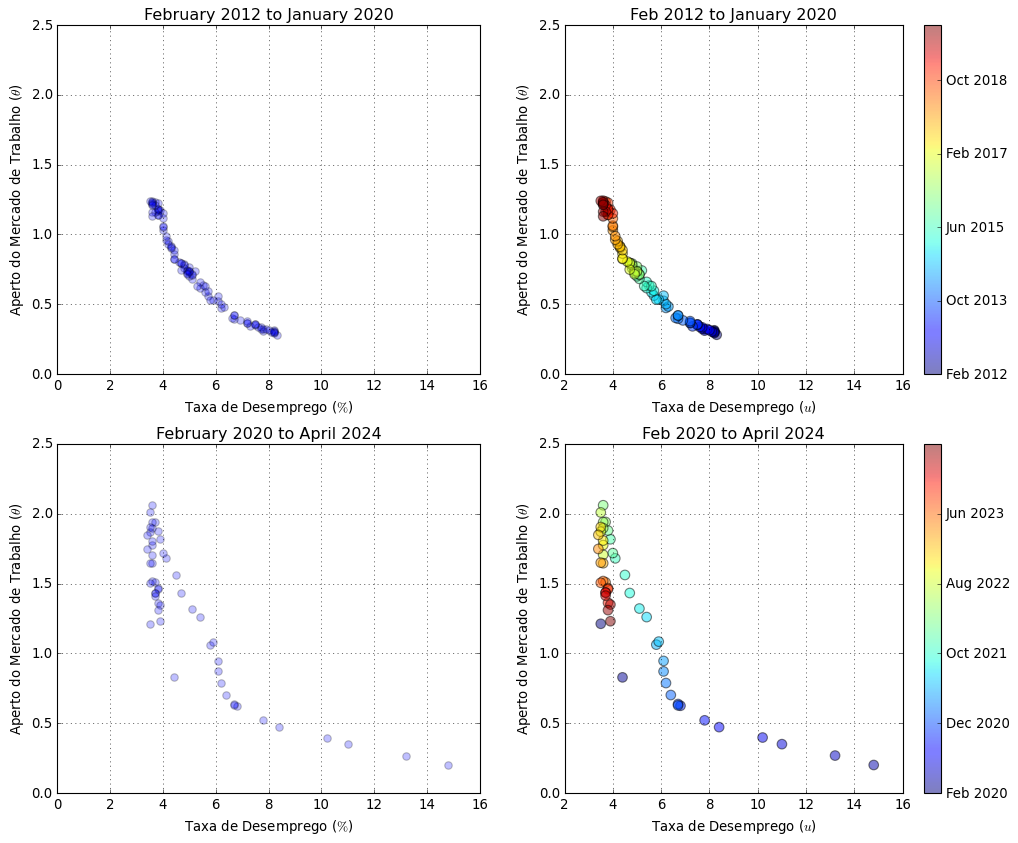

In [263]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(2,2,1)
c = np.arange(len(df_pre_pande.index))
plt.scatter(df_pre_pande['Unemployment rate'].values,df_pre_pande['Market tightness'].values,s=45,c= 'blue',alpha = 0.25)
ax.set_title(df_pre_pande.index[0].strftime('%B %Y')+' to '+df_pre_pande.index[-1].strftime('%B %Y'))
ax.set_ylim(0,2.5)
ax.set_xlim(0,16)
ax.set_xlabel('Taxa de Desemprego ($\%$)')
ax.set_ylabel('Aperto do Mercado de Trabalho ($\\theta$)')
ax.grid()


##############################################################################################################

ax = fig.add_subplot(2,2,2)
c = np.arange(len(df_pre_pande.index))

plt.scatter(df_pre_pande['Unemployment rate'].values,df_pre_pande['Market tightness'].values,s=75,alpha = 0.5,c=c)

cbar = plt.colorbar(ax = ax)
cbar.set_ticks([int(i) for i in cbar.get_ticks()[:-1]])
cbar.set_ticklabels([df_pre_pande.index[int(i)].strftime('%b %Y') for i in cbar.get_ticks()])

ax.set_title(df_pre_pande.index[0].strftime('%b %Y')+' to '+ df_pre_pande.index[-1].strftime('%B %Y'))
ax.set_xlim(2,16)
ax.set_ylim(0,2.5)
ax.set_xlabel('Taxa de Desemprego ($u$)')
ax.set_ylabel('Aperto do Mercado de Trabalho ($\\theta$)')
ax.grid()


# Parte debaixo 
#############################################################################################

ax = fig.add_subplot(2,2,3)
c = np.arange(len(df_post_pande.index))
plt.scatter(df_post_pande['Unemployment rate'].values,df_post_pande['Market tightness'].values,s=45,c= 'blue',alpha = 0.25)
ax.set_ylim(0,2.5)
ax.set_xlim(0,16)
ax.set_title(df_post_pande.index[0].strftime('%B %Y')+' to '+df_post_pande.index[-1].strftime('%B %Y'))
ax.set_xlabel('Taxa de Desemprego ($\%$)')
ax.set_ylabel('Aperto do Mercado de Trabalho ($\\theta$)')
ax.grid()


ax = fig.add_subplot(2,2,4)
c = np.arange(len(df_post_pande.index))
plt.scatter(df_post_pande['Unemployment rate'].values,df_post_pande['Market tightness'].values,s=75,alpha = 0.5,c=c)
cbar = plt.colorbar(ax = ax)
cbar.set_ticks([int(i) for i in cbar.get_ticks()[:-1]])
cbar.set_ticklabels([df_post_pande.index[int(i)].strftime('%b %Y') for i in cbar.get_ticks()])
ax.set_title(df_post_pande.index[0].strftime('%b %Y')+' to '+ df_post_pande.index[-1].strftime('%B %Y'))
ax.set_xlim(2,16)
ax.set_ylim(0,2.5)
ax.set_xlabel('Taxa de Desemprego ($u$)')
ax.set_ylabel('Aperto do Mercado de Trabalho ($\\theta$)')
ax.grid()

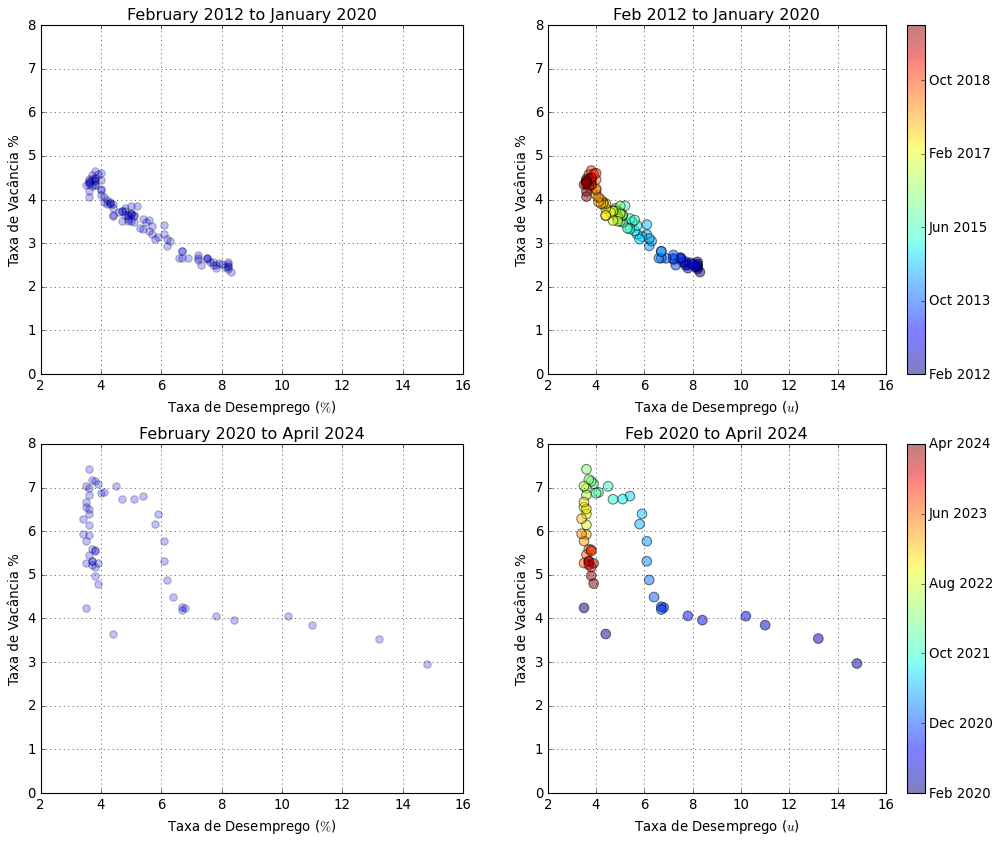

In [240]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(2,2,1)
c = np.arange(len(df_pre_pande.index))
plt.scatter(df_pre_pande['Unemployment rate'].values,df_pre_pande['Vacancy rate'].values,s=45,c= 'blue',alpha = 0.25)
ax.set_title(df_pre_pande.index[0].strftime('%B %Y')+' to '+df_pre_pande.index[-1].strftime('%B %Y'))
ax.set_xlim(2,16)
ax.set_ylim(0,8)
ax.set_xlabel('Taxa de Desemprego ($\%$)')
ax.set_ylabel('Taxa de Vacância %')
ax.grid()


##############################################################################################################

ax = fig.add_subplot(2,2,2)
c = np.arange(len(df_pre_pande.index))
plt.scatter(df_pre_pande['Unemployment rate'].values,df_pre_pande['Vacancy rate'].values,s=75,alpha = 0.5,c=c)
cbar = plt.colorbar(ax = ax)
cbar.set_ticks([int(i) for i in cbar.get_ticks()[:]])
cbar.set_ticklabels([df_pre_pande.index[int(i)].strftime('%b %Y') for i in cbar.get_ticks()])
ax.set_title(df_pre_pande.index[0].strftime('%b %Y')+' to '+ df_pre_pande.index[-1].strftime('%B %Y'))
ax.set_xlim(2,16)
ax.set_ylim(0,8)
ax.set_xlabel('Taxa de Desemprego ($u$)')
ax.set_ylabel('Taxa de Vacância %')
ax.grid()


# Parte debaixo 
#############################################################################################

ax = fig.add_subplot(2,2,3)
c = np.arange(len(df_post_pande.index))
plt.scatter(df_post_pande['Unemployment rate'].values,df_post_pande['Vacancy rate'].values,s=45,c= 'blue',alpha = 0.25)
ax.set_title(df_post_pande.index[0].strftime('%B %Y')+' to '+df_post_pande.index[-1].strftime('%B %Y'))
ax.set_xlim(2,16)
ax.set_ylim(0,8)
ax.set_xlabel('Taxa de Desemprego ($\%$)')
ax.set_ylabel('Taxa de Vacância %')
ax.grid()

ax = fig.add_subplot(2,2,4)
c = np.arange(len(df_post_pande.index))
plt.scatter(df_post_pande['Unemployment rate'].values,df_post_pande['Vacancy rate'].values,s=75,alpha = 0.5,c=c)

cbar = plt.colorbar(ax = ax)
cbar.set_ticks([int(i) for i in cbar.get_ticks()[:]])
cbar.set_ticklabels([df_post_pande.index[int(i)].strftime('%b %Y') for i in cbar.get_ticks()])

ax.set_title(df_post_pande.index[0].strftime('%b %Y')+' to '+ df_post_pande.index[-1].strftime('%B %Y'))
ax.set_xlim(2,16)
ax.set_ylim(0,8)
ax.set_xlabel('Taxa de Desemprego ($u$)')
ax.set_ylabel('Taxa de Vacância %')
ax.grid()